This notebook is to explore Zipf's law inspired by this vsauce video I came across some years ago
https://www.youtube.com/watch?v=fCn8zs912OE

I find it interesting. Not sure that it can be applied for the purpose of this project

In [89]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv('./data/combinded_condensed.csv')

df.head()

In [11]:
# starting just using the title column for x
X = df['title']
y = df['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1357)

cv = CountVectorizer()

cv.fit(X_train)

X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

In [12]:
cv.get_feature_names_out().shape

(10803,)

In [15]:
X_train_cv.shape

(7389, 10803)

In [14]:
X_test_cv.shape

(2464, 10803)

In [22]:
# from class notes
text_df = pd.DataFrame(X_train_cv.A, columns=cv.get_feature_names_out())
text_df.sum().sort_values(ascending=False).head(25)

to         5266
you        4706
the        3947
lpt        3689
ulpt       3557
and        2794
your       2548
request    2324
if         1991
it         1922
of         1915
in         1738
for        1673
on         1328
can        1300
how        1277
with       1104
that       1042
is         1036
get        1009
or          974
my          896
when        895
do          850
have        815
dtype: int64

In [24]:
list(text_df.sum().sort_values(ascending=False))

[5266,
 4706,
 3947,
 3689,
 3557,
 2794,
 2548,
 2324,
 1991,
 1922,
 1915,
 1738,
 1673,
 1328,
 1300,
 1277,
 1104,
 1042,
 1036,
 1009,
 974,
 896,
 895,
 850,
 815,
 792,
 768,
 758,
 728,
 679,
 671,
 670,
 644,
 608,
 574,
 562,
 555,
 555,
 549,
 544,
 540,
 528,
 442,
 416,
 416,
 414,
 411,
 352,
 350,
 350,
 348,
 346,
 345,
 340,
 336,
 320,
 317,
 316,
 305,
 304,
 298,
 295,
 284,
 281,
 274,
 267,
 266,
 265,
 261,
 254,
 254,
 253,
 245,
 240,
 238,
 229,
 228,
 227,
 225,
 224,
 215,
 211,
 210,
 209,
 208,
 207,
 203,
 202,
 200,
 199,
 196,
 195,
 189,
 189,
 186,
 180,
 178,
 174,
 171,
 170,
 170,
 168,
 164,
 164,
 164,
 162,
 160,
 159,
 157,
 152,
 149,
 149,
 149,
 147,
 146,
 146,
 145,
 144,
 141,
 140,
 139,
 138,
 137,
 136,
 136,
 136,
 134,
 133,
 132,
 131,
 130,
 128,
 127,
 127,
 126,
 124,
 120,
 120,
 119,
 119,
 118,
 118,
 118,
 116,
 116,
 115,
 115,
 114,
 114,
 112,
 111,
 111,
 109,
 109,
 108,
 108,
 104,
 103,
 102,
 102,
 101,
 100,
 100,
 1

In [167]:
#testing zipf to predict expected word count based on count rank

size = text_df.sum().sort_values(ascending=False).shape[0]
largest = text_df.sum().sort_values(ascending=False)[0]

actuals = np.array(text_df.sum().sort_values(ascending=False))
expecteds = np.array([largest / (i+1) for i in range(size)])

In [154]:
mean_absolute_error(actuals, expecteds)

8.222692471322187

In [155]:
mean_squared_error(actuals, expecteds)

5030.402889643296

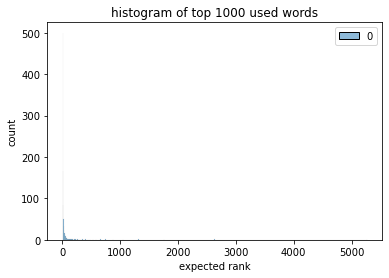

In [175]:
#hist of expected ranks

sns.histplot(pd.DataFrame(expecteds[:1000]),bins=1000)

plt.xlabel('expected rank')
plt.ylabel('count')
plt.title('histogram of top 1000 used words');

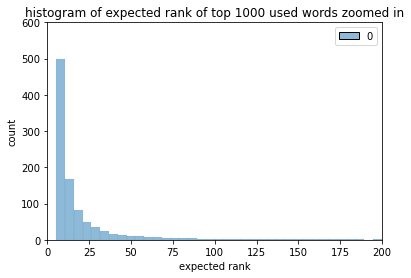

In [176]:
# same as above plot just zoomed in

sns.histplot(pd.DataFrame(expecteds[:1000]), bins = 1000)

plt.ylim([0,600])
plt.xlim([0,200])
plt.xlabel('expected rank')
plt.ylabel('count')
plt.title('histogram of expected rank of top 1000 used words zoomed in');

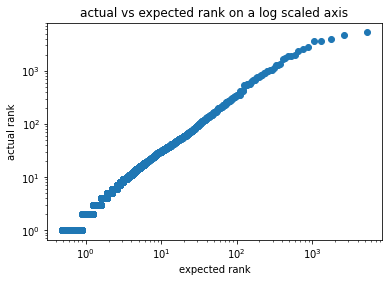

In [177]:
plt.scatter(expecteds, actuals)

plt.yscale('log')
plt.xscale('log')
plt.xlabel('expected rank')
plt.ylabel('actual rank')
plt.title('actual vs expected rank on a log scaled axis');

In [159]:
#testing zipf to predict expected count rank based on count

actuals = 1/ np.array((list(range(1, size + 1))))
largest_array = np.array([largest] * size)
vals = np.array(text_df.sum().sort_values(ascending=False))
expecteds = vals / largest_array

In [160]:
mean_absolute_error(actuals, expecteds)

0.0015614683766278364

In [161]:
mean_squared_error(actuals, expecteds)

0.00018140157771549017

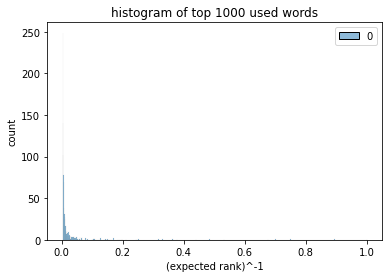

In [162]:
#hist of expected ranks

sns.histplot(pd.DataFrame(expecteds[:1000]),bins=1000)

plt.xlabel('(expected rank)^-1')
plt.ylabel('count')
plt.title('histogram of top 1000 used words');

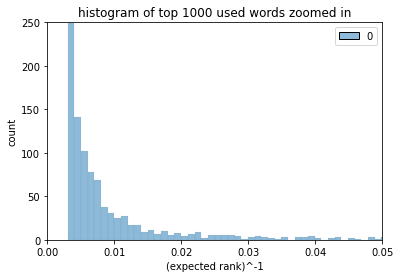

In [163]:
# same as above plot just zoomed in

sns.histplot(pd.DataFrame(expecteds[:1000]), bins = 1000)

plt.ylim([0,250])
plt.xlim([0,.05])
plt.xlabel('(expected rank)^-1')
plt.ylabel('count')
plt.title('histogram of top 1000 used words zoomed in');

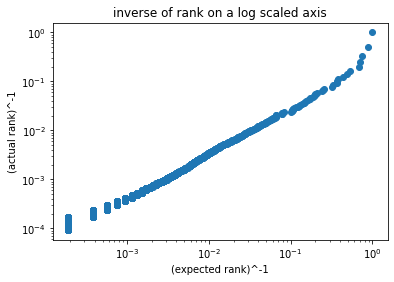

In [164]:
plt.scatter(expecteds, actuals)

plt.yscale('log')
plt.xscale('log')
plt.xlabel('(expected rank)^-1')
plt.ylabel('(actual rank)^-1')
plt.title('inverse of rank on a log scaled axis');